🔹 Đang tải dữ liệu kiểm tra...
Tải dữ liệu thành công!

🔹 Đang tải các mô hình đã huấn luyện...


Tải mô hình thành công!

🔹 Thực hiện dự đoán trên tập test...
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Dự đoán hoàn tất!

     KẾT QUẢ ĐÁNH GIÁ MÔ HÌNH

--- 1. Mô hình Machine Learning (Random Forest) ---
🎯 Độ chính xác (Accuracy): 0.928

Báo cáo phân loại (Classification Report):
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7000
           1       0.89      0.77      0.83      2000

    accuracy                           0.93      9000
   macro avg       0.91      0.87      0.89      9000
weighted avg       0.93      0.93      0.93      9000


Ma trận nhầm lẫn (Confusion Matrix):


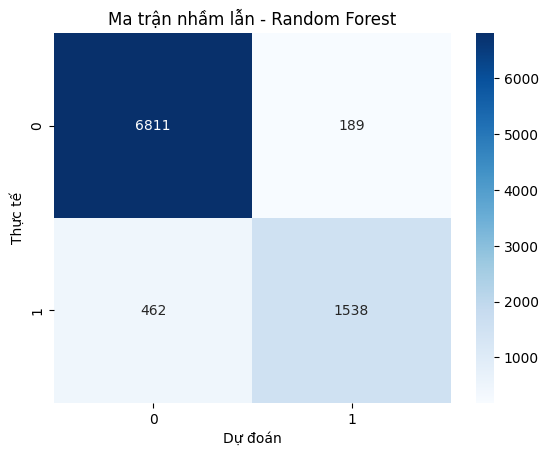


--- 2. Mô hình Mạng Nơ-ron (Neural Network) ---
🎯 Độ chính xác (Accuracy): 0.914

Báo cáo phân loại (Classification Report):
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7000
           1       0.89      0.70      0.78      2000

    accuracy                           0.91      9000
   macro avg       0.90      0.84      0.86      9000
weighted avg       0.91      0.91      0.91      9000


Ma trận nhầm lẫn (Confusion Matrix):


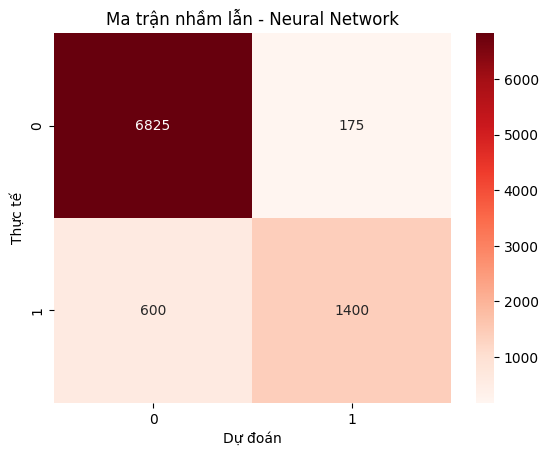


     KẾT LUẬN

🏆 Mô hình Machine Learning (Random Forest) hoạt động tốt hơn với độ chính xác 0.928.


In [2]:
import numpy as np
import joblib
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. TẢI DỮ LIỆU KIỂM TRA ---
# Chúng ta chỉ cần dữ liệu test để "chấm điểm" các mô hình
print("🔹 Đang tải dữ liệu kiểm tra...")
data = np.load("../split_data.npz")
X_test, y_test = data['X_test'], data['y_test']
print("Tải dữ liệu thành công!")

# --- 2. TẢI CÁC MÔ HÌNH ĐÃ HUẤN LUYỆN ---
print("\n🔹 Đang tải các mô hình đã huấn luyện...")
# Tải mô hình Machine Learning tốt nhất (Random Forest)
ml_model = joblib.load("../models/best_model.pkl")

# Tải mô hình Mạng Nơ-ron
nn_model = load_model("../models/loan_model.h5")
print("Tải mô hình thành công!")

# --- 3. ĐƯA RA DỰ ĐOÁN TRÊN TẬP TEST ---
print("\n🔹 Thực hiện dự đoán trên tập test...")
# Dự đoán bằng mô hình ML
y_pred_ml = ml_model.predict(X_test)

# Dự đoán bằng mô hình NN
# Đầu ra của mạng nơ-ron là xác suất, ta chuyển về nhãn 0 hoặc 1
y_pred_nn_proba = nn_model.predict(X_test)
y_pred_nn = (y_pred_nn_proba > 0.5).astype(int)
print("Dự đoán hoàn tất!")

# --- 4. ĐÁNH GIÁ VÀ SO SÁNH ---
print("\n" + "="*50)
print("     KẾT QUẢ ĐÁNH GIÁ MÔ HÌNH")
print("="*50 + "\n")

# Đánh giá mô hình ML
print("--- 1. Mô hình Machine Learning (Random Forest) ---")
acc_ml = accuracy_score(y_test, y_pred_ml)
print(f"🎯 Độ chính xác (Accuracy): {acc_ml:.3f}")
print("\nBáo cáo phân loại (Classification Report):")
print(classification_report(y_test, y_pred_ml))
print("\nMa trận nhầm lẫn (Confusion Matrix):")
cm_ml = confusion_matrix(y_test, y_pred_ml)
sns.heatmap(cm_ml, annot=True, fmt='d', cmap='Blues')
plt.title('Ma trận nhầm lẫn - Random Forest')
plt.ylabel('Thực tế')
plt.xlabel('Dự đoán')
plt.show()

# Đánh giá mô hình NN
print("\n--- 2. Mô hình Mạng Nơ-ron (Neural Network) ---")
acc_nn = accuracy_score(y_test, y_pred_nn)
print(f"🎯 Độ chính xác (Accuracy): {acc_nn:.3f}")
print("\nBáo cáo phân loại (Classification Report):")
print(classification_report(y_test, y_pred_nn))
print("\nMa trận nhầm lẫn (Confusion Matrix):")
cm_nn = confusion_matrix(y_test, y_pred_nn)
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Reds')
plt.title('Ma trận nhầm lẫn - Neural Network')
plt.ylabel('Thực tế')
plt.xlabel('Dự đoán')
plt.show()

# --- 5. KẾT LUẬN ---
print("\n" + "="*50)
print("     KẾT LUẬN")
print("="*50 + "\n")
if acc_ml > acc_nn:
    print(f"🏆 Mô hình Machine Learning (Random Forest) hoạt động tốt hơn với độ chính xác {acc_ml:.3f}.")
else:
    print(f"🏆 Mô hình Mạng Nơ-ron hoạt động tốt hơn với độ chính xác {acc_nn:.3f}.")